# 🧪 H(e,e′p) Elastic Analysis — Detector Offset Runs

In this notebook, we analyze a series of **H(e,e′p)** elastic *singles* runs to extract detector offsets. Each run corresponds to a specific spectrometer setting. The High Momentum Spectrometer (HMS) is used to detect the scattered electron or proton depending on the configuration, and the goal is to refine offset parameters such as angles and momentum calibration for improved reconstruction accuracy.

---

## 📋 Run Details

| Setting | Run(s)            | Beam Energy (GeV) | HMS Angle (deg) | HMS Central Momentum (GeV) |
|--------:|-------------------|------------------:|-----------------:|----------------------------:|
| 1       | 1249              | 10.5439           | 12.395           | 6.117                       |
| 2       | 1250              | 10.5436           | 19.260           | 6.117                       |
| 3       | 1251, 1252        | 10.5433           | 20.700           | 6.117                       |
| 4       | 1253              | 10.5435           | 20.700(check)           | 6.117                       |
| 5       | 1534              | 10.5437           | 19.145           | 6.667                       |
| 6       | 1535              | 10.5437           | 17.995           | 6.667                       |
| 7       | 1536              | 10.5436           | 16.850           | 6.667                       |
| 8       | 1714              | 10.5440           | 22.830           | 5.878                       |
| 9       | 1715, 1716        | 10.5440           | 21.680           | 5.878                       |
| 10      | 6705, 6828–6840   | 6.3972            | 24.860           | 4.042                       |

---

## 🛠️ Analysis Goals

- Perform elastic peak fitting to extract the momentum and angle offsets.
- Compare reconstructed kinematics with expected elastic kinematics.
- Optimize detector calibration parameters based on residuals.
- Cross-check offsets across different settings and beam energies.

---

## 📐 Formulae and Kinematic Relations

*To be included later.*

---

📌 *Note: Ensure that the appropriate HMS polarity and acceptance settings are used for each run group.*


In [25]:
import pandas as pd

# Define the elastic settings and placeholder values for dw
data = [
    [1, "1249",           10.54386781, 12.395, 6.117, None, None],
    [2, "1250",           10.54364850, 19.260, 6.117, None, None],
    [3, "1251",           10.54330237, 19.260, 6.117, None, None],
    [4, "1252",           10.54346881, 20.700, 6.117, None, None],
    [5, "1253",           10.54353183, 22.120, 6.117, None, None],
    [6, "1534",           10.54371873, 19.145, 6.667, None, None],
    [7, "1535",           10.54366713, 17.995, 6.667, None, None],
    [8, "1536",           10.54363166, 16.850, 6.667, None, None],
    [9, "1714",           10.54402191, 22.830, 5.878, None, None],
    [10, "1715, 1716",     10.5440, 21.680, 5.878, None, None],
    [11, "6828–6840",     6.3972, 24.860, 4.042, None, None]
]

# Column names for the CSV
columns = ["Setting", "Runs", "Beam_E_GeV", "HMS_Angle_deg", "HMS_P0_GeV", "dW_meas", "Residual"]

# Create DataFrame
df_settings = pd.DataFrame(data, columns=columns)

# Save to CSV
df_settings.to_csv("settings.csv", index=False)

# Display the DataFrame
df_settings


,Setting,Runs,Beam_E_GeV,HMS_Angle_deg,HMS_P0_GeV,dW_meas,Residual
0,1,1249,10.543868,12.395,6.117,None,None
1,2,1250,10.543648,19.260,6.117,None,None
2,3,1251,10.543302,19.260,6.117,None,None
3,4,1252,10.543469,20.700,6.117,None,None
4,5,1253,10.543532,22.120,6.117,None,None
5,6,1534,10.543719,19.145,6.667,None,None
6,7,1535,10.543667,17.995,6.667,None,None
7,8,1536,10.543632,16.850,6.667,None,None
8,9,1714,10.544022,22.830,5.878,None,None
9,10,"1715, 1716",10.544000,21.680,5.878,None,None


## 🧮 Proton Kinematics Calculation from Beam and Electron Scattering Data

This section computes the **proton scattering angle** and **momentum** in elastic H(e,e'p) events using basic two-body kinematics.

### ✏️ Inputs:
- Beam energy $ E_{\text{beam}} $
- Scattered electron angle \( \theta_e \)
- Scattered electron momentum \( P_e \)

### 📤 Outputs:
- Proton scattering angle \( \theta_p \)
- Proton momentum \( P_p \)
- Computed electron momentum from elastic kinematics $ P_e^{\text{elastic}} $

The calculation uses energy-momentum conservation under the assumption of elastic scattering off a stationary proton.

---


In [26]:
import math

def calculate_proton_properties(beam_energy, electron_angle, electron_momentum):
    """
    Calculate the proton angle and momentum based on elastic kinematics.

    Parameters:
    beam_energy (float): Beam energy in GeV.
    electron_angle (float): Scattered electron angle θ_e in degrees.
    electron_momentum (float): Measured scattered electron momentum P_e in GeV.

    Returns:
    tuple: (Proton angle θ_p in degrees, proton momentum P_p in GeV, calculated elastic P_e in GeV)
    """
    mass_e = 0.000511  # GeV
    mass_p = 0.938272  # GeV

    initial_momentum = math.sqrt(beam_energy**2 - mass_e**2)
    theta_e_rad = math.radians(electron_angle)

    pe_elastic = initial_momentum / (1 + (2 * initial_momentum / mass_p) * (math.sin(theta_e_rad / 2))**2)

    tan_theta_p = (pe_elastic * math.sin(theta_e_rad)) / (initial_momentum - pe_elastic * math.cos(theta_e_rad))
    theta_p = math.atan(tan_theta_p)
    theta_p_deg = math.degrees(theta_p)

    pp = math.sqrt((initial_momentum + mass_p - pe_elastic)**2 - mass_p**2)

    return theta_p_deg, pp, pe_elastic


In [27]:
import pandas as pd

# Load the settings CSV
df = pd.read_csv("settings.csv")

# Lists to store results
proton_angles = []
proton_momenta = []
pe_kin_calc = []

# Loop over each row and compute kinematics
for _, row in df.iterrows():
    beam_E = row["Beam_E_GeV"]
    theta_e = row["HMS_Angle_deg"]
    pe_measured = row["HMS_P0_GeV"]

    theta_p, pp, pe_calc = calculate_proton_properties(beam_E, theta_e, pe_measured)
    
    proton_angles.append(theta_p)
    proton_momenta.append(pp)
    pe_kin_calc.append(pe_calc)

# Add new columns to DataFrame
df["Proton_Angle_deg"] = proton_angles
df["Proton_P_GeV"] = proton_momenta
df["Electron_P_GeV"] = pe_kin_calc

# Show and save updated table
df.to_csv("settings_with_kinematics.csv", index=False)
df


,Setting,Runs,Beam_E_GeV,HMS_Angle_deg,HMS_P0_GeV,dW_meas,Residual,Proton_Angle_deg,Proton_P_GeV,Electron_P_GeV
0,1,1249,10.543868,12.395,6.117,NaN,NaN,36.961912,2.982732,8.355313
1,2,1250,10.543648,19.260,6.117,NaN,NaN,25.715849,4.920539,6.472723
2,3,1251,10.543302,19.260,6.117,NaN,NaN,25.716524,4.920319,6.472593
3,4,1252,10.543469,20.700,6.117,NaN,NaN,24.106061,5.288494,6.110658
4,5,1253,10.543532,22.120,6.117,NaN,NaN,22.688132,5.633526,5.770677
5,6,1534,10.543719,19.145,6.667,NaN,NaN,25.852658,4.890434,6.502362
6,7,1535,10.543667,17.995,6.667,NaN,NaN,27.297711,4.583160,6.803723
7,8,1536,10.543632,16.850,6.667,NaN,NaN,28.886560,4.267684,7.112294
8,9,1714,10.544022,22.830,5.878,NaN,NaN,22.033810,5.799436,5.607448
9,10,"1715, 1716",10.544000,21.680,5.878,NaN,NaN,23.110141,5.528918,5.874305


# Starting the analysis

In [28]:
# === Define setting-to-SIMC mapping ===
setting_to_simcfile = {
    1: "eep_hydrogen_1249.root",
    2: "eep_hydrogen_1250.root",
    3: "eep_hydrogen_1251.root",
    4: "eep_hydrogen_1252.root",
    5: "eep_hydrogen_1253.root",
    6: "eep_hydrogen_1534.root",
    7: "eep_hydrogen_1535.root",
    8: "eep_hydrogen_1536.root",
    9: "eep_hydrogen_1714.root",
    10: "eep_hydrogen_1715_1716.root",  # you may average 1715+1716 or pick one
    11: "eep_hydrogen_6828_6841.root",  # or a merged file
}

# --- Effective charge (in millicoulombs) for data ---
effective_charge_map = {
    2: "39.5321",
    3: "35.1559",
    4: "23.715",
    5: "53.3532",
    6: "1",
    7: "1",
    8: "1",
    9: "68.8866",
    10: "178.1103",
    11: "456.999"
}

# --- SIMC normfac values per setting ---
normfac_map = {
    1: 0.166473E+08, 2: 0.164131E+08, 10: 0.163935E+08, 11: 0.672355E+07
    # Add other settings if needed
}

nevents_simc = 100000


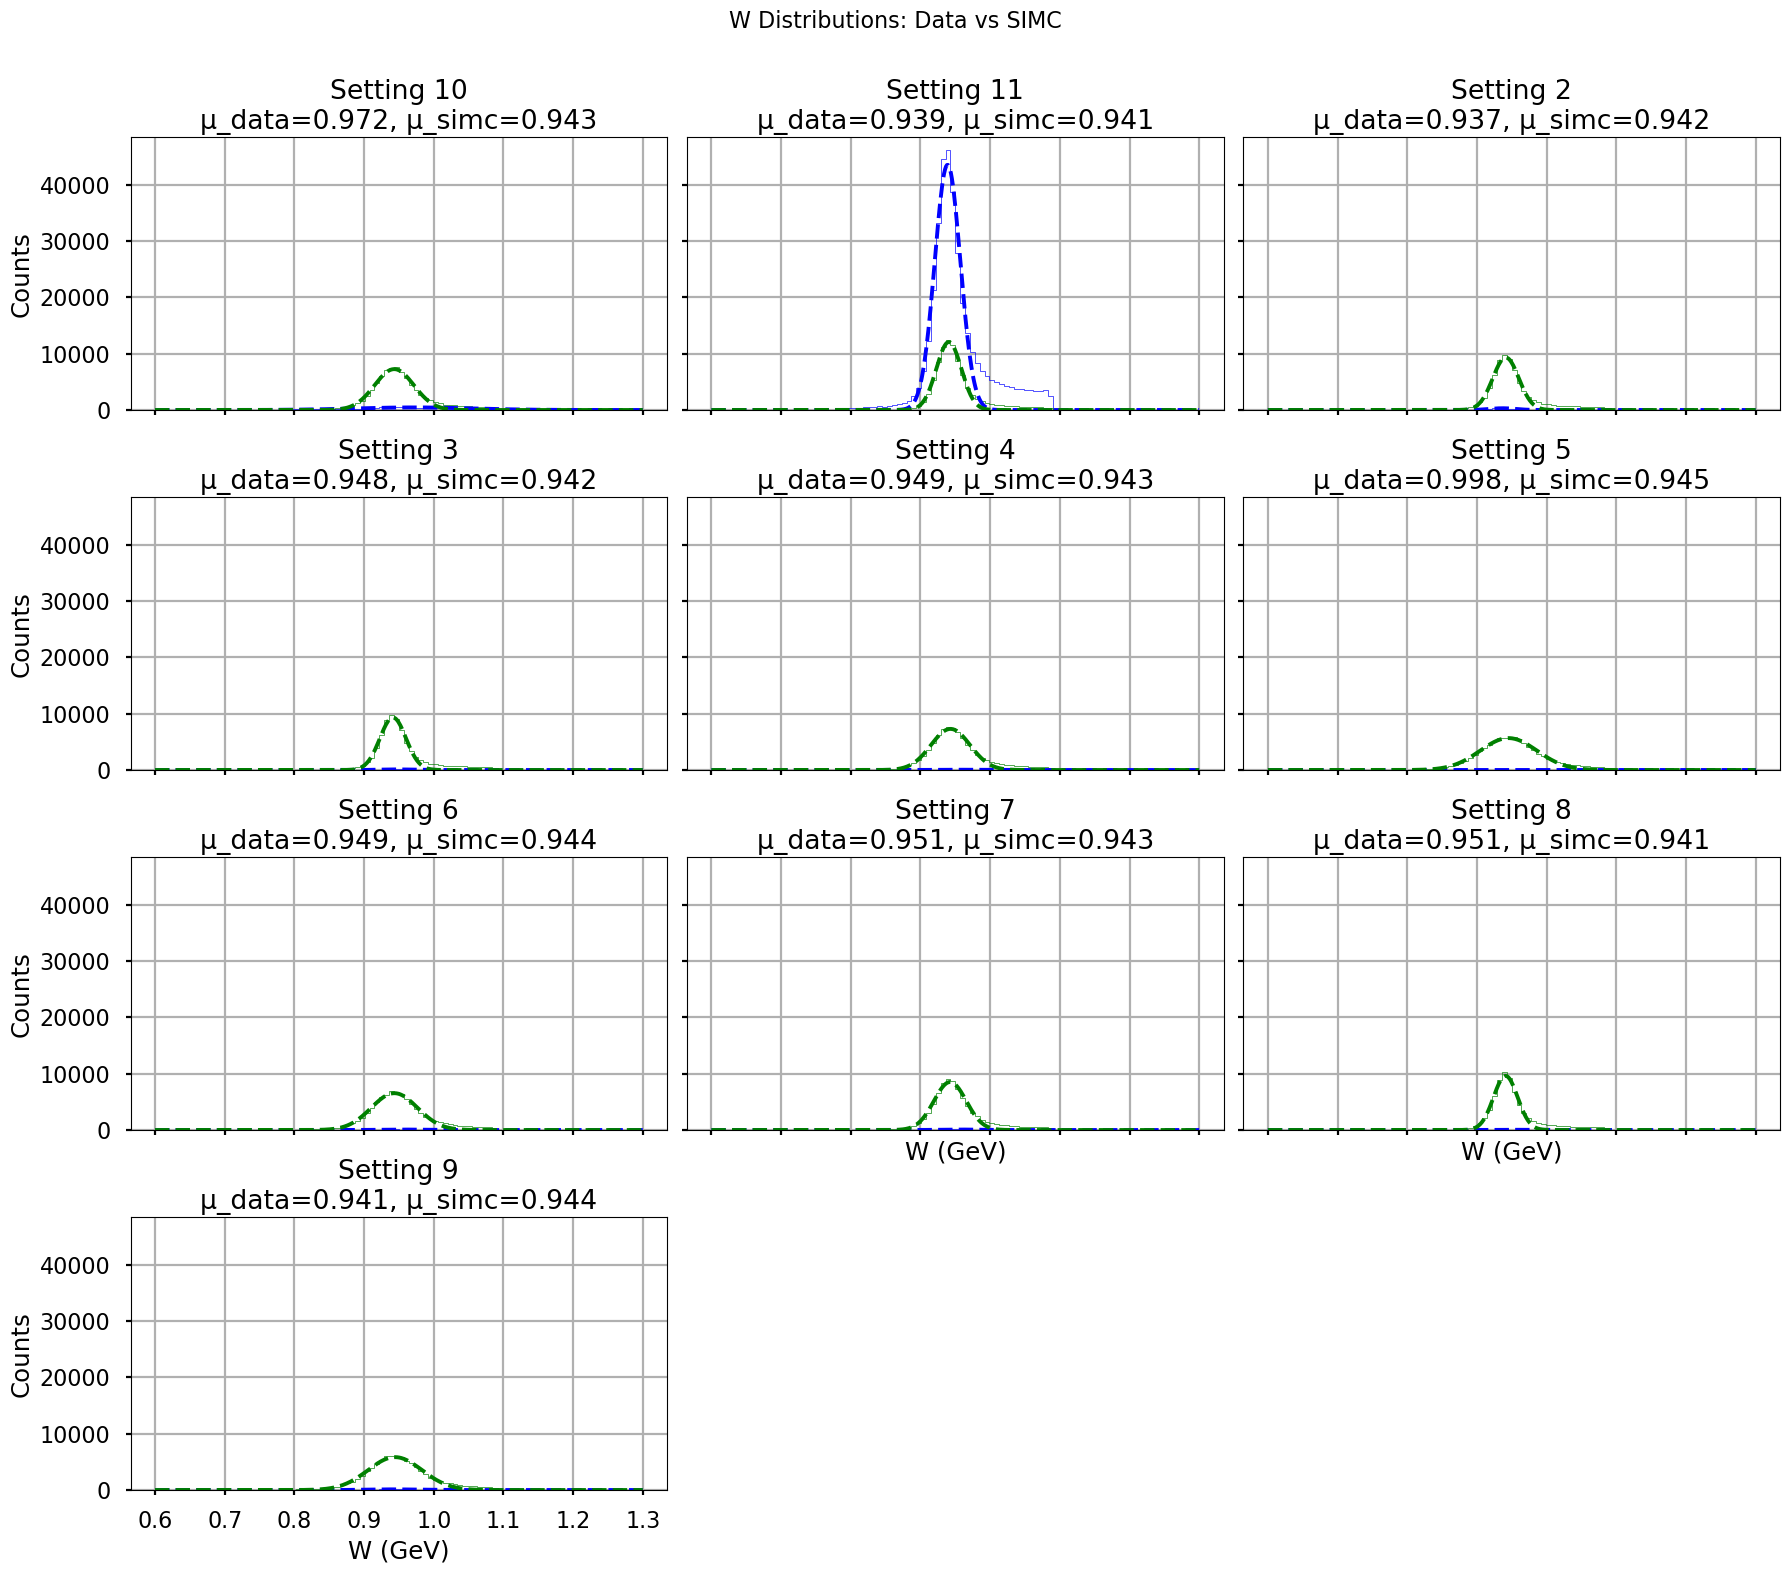

Updated CSV saved to settings_with_kinematics.csv
Analysis complete. Multi-panel plot and sorted CSV saved.


,Setting,Runs,Beam_E_GeV,HMS_Angle_deg,HMS_P0_GeV,dW_meas,Residual,Proton_Angle_deg,Proton_P_GeV,Electron_P_GeV,mu_data,mu_simc,dWmeas,sigma_data,sigma_simc
0,1,1249,10.543868,12.395,6.117,NaN,NaN,36.961912,2.982732,8.355313,NaN,NaN,NaN,NaN,NaN
1,2,1250,10.543648,19.260,6.117,NaN,NaN,25.715849,4.920539,6.472723,0.936915,0.941502,-0.004588,0.018948,0.018673
2,3,1251,10.543302,19.260,6.117,NaN,NaN,25.716524,4.920319,6.472593,0.947823,0.941500,0.006323,0.024242,0.018672
3,4,1252,10.543469,20.700,6.117,NaN,NaN,24.106061,5.288494,6.110658,0.948964,0.943126,0.005838,0.030050,0.028076
4,5,1253,10.543532,22.120,6.117,NaN,NaN,22.688132,5.633526,5.770677,0.997596,0.945476,0.052119,0.101045,0.040713
5,6,1534,10.543719,19.145,6.667,NaN,NaN,25.852658,4.890434,6.502362,0.949286,0.943567,0.005719,0.028800,0.033021
6,7,1535,10.543667,17.995,6.667,NaN,NaN,27.297711,4.583160,6.803723,0.950793,0.942522,0.008271,0.024643,0.023176
7,8,1536,10.543632,16.850,6.667,NaN,NaN,28.886560,4.267684,7.112294,0.951209,0.941168,0.010041,0.023102,0.017255
8,9,1714,10.544022,22.830,5.878,NaN,NaN,22.033810,5.799436,5.607448,0.941034,0.944469,-0.003434,0.034747,0.038650
9,10,"1715, 1716",10.544000,21.680,5.878,NaN,NaN,23.110141,5.528918,5.874305,0.972154,0.943319,0.028836,0.084048,0.028200


In [29]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import glob
import os
import pandas as pd


# === Settings ===
data_dir = "./data/merged_elastics"
simc_dir = "./data/simc"
output_dir = "diagnostic_plots"
os.makedirs(output_dir, exist_ok=True)

# === Gaussian fit function ===
def gauss(x, A, mu, sigma):
    return A * np.exp(- (x - mu)**2 / (2 * sigma**2))

# === Extract W values from ROOT file using uproot ===
def extract_w(filename, branch="W", selection=None):
    with uproot.open(filename) as f:

        if branch == "H.kin.W":
            tree = f["T"]
            data = tree.arrays([branch, "H.cal.etottracknorm", "H.cer.npeSum",
                                "H.gtr.th", "H.gtr.ph"], library="np")
            W = data[branch]
        
            mask = (abs(data["H.kin.W"] - 0.938) < 0.15) & (data["H.cal.etottracknorm"] > 0.9) & (data["H.cer.npeSum"]>0.5) & (abs(data["H.gtr.th"])<0.09) & (abs(data["H.gtr.ph"])<0.055)
            if selection is not None:
                mask &= selection(data)
            return W[mask]
        
        if branch == "W":
            tree = f["h10"]
            simc = tree.arrays([branch, "hsxptar", "hsyptar"], library="np")
            W = simc[branch]
        
            mask = (abs(simc["W"] - 0.938) < 0.15) & (abs(simc["hsxptar"]) < 0.09) & (abs(simc["hsyptar"]) < 0.055)
            if selection is not None:
                mask &= selection(data)
            return W[mask]

# === Fit Gaussian to histogram ===
def fit_gaussian(hist_vals, bin_edges):
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    A0 = np.max(hist_vals)
    mu0 = bin_centers[np.argmax(hist_vals)]
    sigma0 = np.std(bin_centers)
    try:
        popt, _ = curve_fit(gauss, bin_centers, hist_vals, p0=[A0, mu0, sigma0])
        return popt  # A, mu, sigma
    except RuntimeError:
        return None

# === Main loop ===
results = []

for data_file in sorted(glob.glob(f"{data_dir}/merged_setting_*.root")):
    # Extract setting number
    setting = os.path.basename(data_file).split("_")[-1].replace(".root", "")
    if setting.isdigit():
        setting_idx = int(setting)
        if setting_idx not in setting_to_simcfile:
            print(f"Skipping setting {setting}: SIMC mapping not found.")
            continue
        simc_file = os.path.join(simc_dir, setting_to_simcfile[setting_idx])
    else:
        print(f"Invalid setting format: {setting}")
        continue

    
    if not os.path.exists(simc_file):
        print(f"Skipping setting {setting}: SIMC file not found.")
        continue

    # Extract W values
    data_W = extract_w(data_file, "H.kin.W")
    simc_W = extract_w(simc_file, "W")

    if len(data_W) == 0 or len(simc_W) == 0:
        print(f"No W entries after cuts for setting {setting}")
        continue

    # Histogram parameters
    bins = 100
    range_W = (0.6, 1.3)

    hist_data, bins_data = np.histogram(data_W, bins=bins, range=range_W)
    hist_simc, bins_simc = np.histogram(simc_W, bins=bins, range=range_W)

    # Gaussian fits
    fit_data = fit_gaussian(hist_data, bins_data)
    fit_simc = fit_gaussian(hist_simc, bins_simc)

    if fit_data is None or fit_simc is None:
        print(f"Fit failed for setting {setting}")
        continue

    A_data, mu_data, sigma_data = fit_data
    A_simc, mu_simc, sigma_simc = fit_simc

    dWmeas = mu_data - mu_simc

    # Save results
    results.append({
        "setting": setting,
        "mu_data": mu_data,
        "mu_simc": mu_simc,
        "dWmeas": dWmeas,
        "sigma_data": sigma_data,
        "sigma_simc": sigma_simc
    })

# === Plot all in subplots ===
ncols = 3
nrows = int(np.ceil(len(results) / ncols))
fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*6, nrows*4), sharex=True, sharey=True)
axs = axs.flatten()

for i, res in enumerate(results):
    setting = res["setting"]
    mu_data = res["mu_data"]
    sigma_data = res["sigma_data"]
    mu_simc = res["mu_simc"]
    sigma_simc = res["sigma_simc"]

    # Recompute histograms for plotting
    data_file = f"{data_dir}/merged_setting_{setting}.root"
    simc_file = os.path.join(simc_dir, setting_to_simcfile[int(setting)])
    data_W = extract_w(data_file, "H.kin.W")
    simc_W = extract_w(simc_file, "W")
    hist_data, bins_data = np.histogram(data_W, bins=bins, range=range_W)
    hist_simc, _ = np.histogram(simc_W, bins=bins, range=range_W)

    bin_centers = 0.5 * (bins_data[:-1] + bins_data[1:])
    xfit = np.linspace(*range_W, 500)

    ax = axs[i]
    ax.hist(data_W, bins=bins, range=range_W, histtype='step', color='blue', label='Data')
    ax.hist(simc_W, bins=bins, range=range_W, histtype='step', color='green', label='SIMC')
    ax.plot(xfit, gauss(xfit, *fit_gaussian(hist_data, bins_data)), 'b--')
    ax.plot(xfit, gauss(xfit, *fit_gaussian(hist_simc, bins_data)), 'g--')
    
    ax.set_title(f"Setting {setting}\nμ_data={mu_data:.3f}, μ_simc={mu_simc:.3f}")
    ax.grid(True)
    if i % ncols == 0:
        ax.set_ylabel("Counts")
    if i >= len(results) - ncols:
        ax.set_xlabel("W (GeV)")

# Hide unused subplots
for j in range(len(results), len(axs)):
    axs[j].axis('off')

fig.suptitle("W Distributions: Data vs SIMC", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
plt.savefig(f"{output_dir}/W_comparison_all_settings.png")
plt.close()

# === Sort and Save CSV ===
# df = pd.DataFrame(results)
# df["setting"] = df["setting"].astype(int)
# df = df.sort_values("setting")
# df.to_csv(f"{output_dir}/dWmeas_summary.csv", index=False)

# === Merge with original settings CSV and overwrite fit results ===
settings_csv_path = "settings_with_kinematics.csv"  # update path if needed
df_results = pd.DataFrame(results)
df_results["Setting"] = df_results["setting"].astype(int)
df_results.drop(columns=["setting"], inplace=True)

# Load the original settings file
df_settings = pd.read_csv(settings_csv_path)
df_settings["Setting"] = df_settings["Setting"].astype(int)

# Drop old fit columns if they already exist
fit_columns = ["mu_data", "mu_simc", "dWmeas", "sigma_data", "sigma_simc"]
df_settings.drop(columns=[col for col in fit_columns if col in df_settings.columns], inplace=True)

# Merge and save
df_merged = pd.merge(df_settings, df_results, on="Setting", how="left")
df_merged = df_merged.sort_values("Setting")
df_merged.to_csv(settings_csv_path, index=False)

print(f"Updated CSV saved to {settings_csv_path}")
print("Analysis complete. Multi-panel plot and sorted CSV saved.")
df_merged